# Tensorboard visualizations
Tensorboar is great tool for visualizing neural networks, its' topology and for logging values during training and evaliation. It's by default prepared for networks build with tensorflow  framework.

More details about tensorboard can be found https://www.tensorflow.org/guide/summaries_and_tensorboard

In [2]:
%load_ext tensorboard.notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

In [4]:
!rm -rf tensorboard_logs
!rm -rf /tmp/.tensorboard-info

---

## Load and preprocess data

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [7]:
test_labels = keras.utils.to_categorical(test_labels, 10)
train_labels = keras.utils.to_categorical(train_labels, 10)

In [8]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [9]:
def data_generator():
    while True:
        idxs = np.random.randint(0, train_images.shape[0], 32)
        images, labels = train_images[idxs], train_labels[idxs]
        yield (images, labels)

---

## Prepare model

In [10]:
log_dir_simple_cnn = 'tensorboard_logs/simple_cnn/'
if not os.path.exists(log_dir_simple_cnn):
    os.makedirs(log_dir_simple_cnn)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(rate=0.3),
    Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(rate=0.3),
    Flatten(),
    Dense(128, activation='relu', name='embedding'),
    Dense(10, activation='softmax')
])

tensorboard = TensorBoard(log_dir=log_dir_simple_cnn, histogram_freq=1, write_graph=True)
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['mse', 'accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.fit(data_generator(),
          batch_size=32,
          steps_per_epoch=100,
          epochs=5,
          verbose=1,
          validation_data=(test_images, test_labels),  callbacks=[tensorboard])

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
100/100 [==============================] - 41s 405ms/step - loss: 1.1408 - mean_squared_error: 0.0542 - acc: 0.5691 - val_loss: 0.7536 - val_mean_squared_error: 0.0376 - val_acc: 0.7298
Epoch 2/5
100/100 [==============================] - 36s 357ms/step - loss: 0.7486 - mean_squared_error: 0.0376 - acc: 0.7259 - val_loss: 0.6357 - val_mean_squared_error: 0.0319 - val_acc: 0.7769
Epoch 3/5
100/100 [==============================] - 41s 409ms/step - loss: 0.6049 - mean_squared_error: 0.0306 - acc: 0.7853 - val_loss: 0.5447 - val_mean_squared_error: 0.0281 - val_acc: 0.7973
Epoch 4/5
100/100 [==============================] - 38s 379ms/step - loss: 0.5652 - mean_squared_error: 0.0291 - acc: 0.7881 - val_loss: 0.5387 - val_mean_squared_error: 0.0277 - val_acc: 0.8041
Epoch 5/5
100/100 [==============================] - 39s 392ms/step - loss: 0.5201 - mean_squared_error: 0.0270 - acc: 0.8059 - val_loss: 0.4873 - val_mean_squared_erro

---

## Tensorboard with histograms and scalars

In [ ]:
%tensorboard --logdir tensorboard_logs/simple_cnn/

## Tensorboard with embedding projection

In [16]:
from image_processing_workshop.tb_projection import get_sprite_img, setup_embedding_projection
import matplotlib.pylab as plt

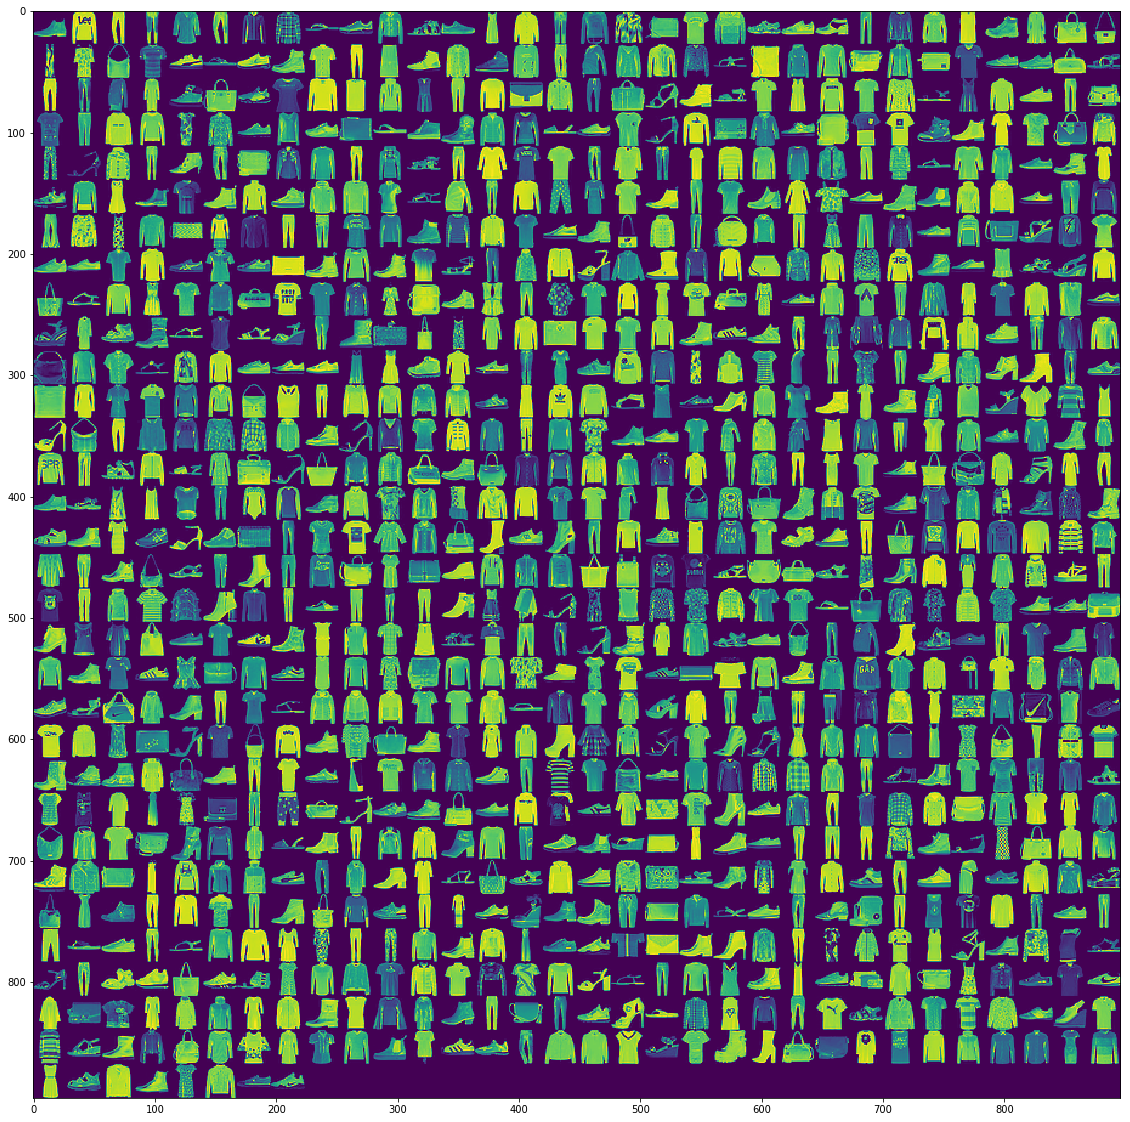

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(get_sprite_img(test_images[:1000]))

In [18]:
setup_embedding_projection(model, test_images[:1000], test_labels[:1000], log_dir_simple_cnn)

In [ ]:
%tensorboard --logdir tensorboard_logs/simple_cnn

## Visualizing Resnet 50

In [20]:
resnet50 = tf.keras.applications.resnet50.ResNet50()

In [21]:
resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [22]:
resnet50_tb = TensorBoard(log_dir="tensorboard_logs/resnet/", histogram_freq=0, write_graph=True, write_images=True)

In [23]:
resnet50_tb.set_model(resnet50)

In [ ]:
%tensorboard --logdir tensorboard_logs/resnet